In [4]:
import random
import math
import statistics as st
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline
# IPython Notebook–specific; means to show in the notebook

In [6]:
help(random.gauss)

Help on method gauss in module random:

gauss(mu, sigma) method of random.Random instance
    Gaussian distribution.
    
    mu is the mean, and sigma is the standard deviation.  This is
    slightly faster than the normalvariate() function.
    
    Not thread-safe without a lock around calls.



In [7]:
data = [random.gauss(0,5) for _ in range(10000)]

# Line Plots

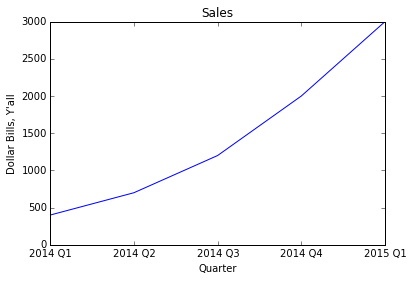

In [8]:
x1 = ['2014 Q1', '2014 Q2', '2014 Q3', '2014 Q4', '2015 Q1']
y1 = [400, 700, 1200, 2000, 3000]
plt.plot(y1)
plt.xticks(range(5), x1)
# plt.yticks(range(0, 3001, 1000),['0', '1k', '2k', '3k'])
plt.xlabel('Quarter')
plt.ylabel("Dollar Bills, Y'all")
plt.title('Sales')
plt.show()

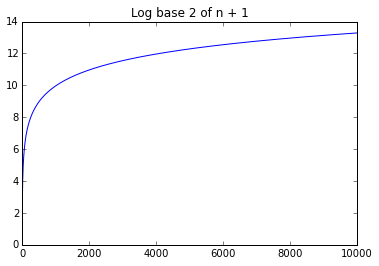

In [9]:
log_nums = [math.log2(n + 1) for n in range(10000)]
plt.plot(log_nums)
plt.title('Log base 2 of n + 1')
plt.show()

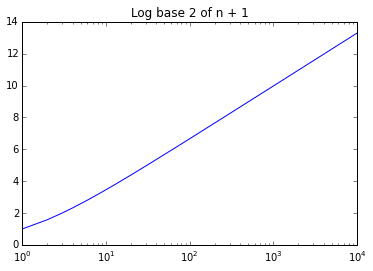

In [10]:
log_nums = [math.log2(n + 1) for n in range(10000)]
plt.plot(log_nums)
plt.title('Log base 2 of n + 1')
plt.xscale('log')
plt.show()

In [11]:
def roll2():
    die1 = random.randint(1, 6)
    die2 = random.randint(1, 6)
    
    return die1 - die2

In [12]:
num = 0
nums = []
for _ in range(10000):
    num += roll2()
    nums.append(num)

In [13]:
num

-179

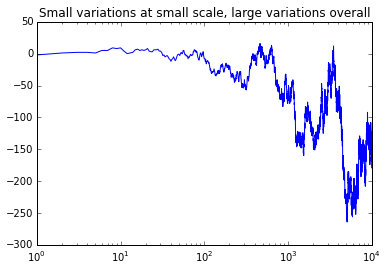

In [14]:
plt.plot(nums)
plt.xscale('log')
plt.title('Small variations at small scale, large variations overall')
plt.show()

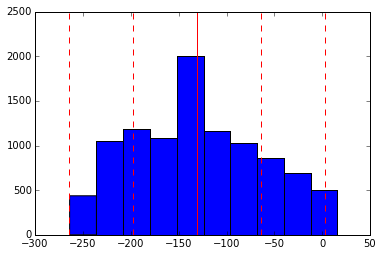

In [15]:
# plt.scatter(*zip(*tuple))
plt.hist(nums)
mean = st.mean(nums)
stdev = st.stdev(nums)
ymin, ymax = plt.ylim()

plt.vlines(mean, ymin, ymax, color='red')
plt.vlines([mean - 2 * stdev, mean - stdev, mean + stdev, mean + 2 * stdev], ymin, ymax, color='red', linestyle='dashed' )


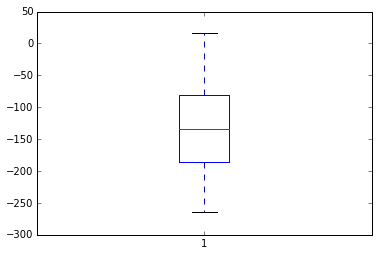

In [16]:
group1 = [random.triangular(20, 180, 100) for _ in range(10000)]
plt.boxplot(nums)
plt.show()

# Flipping Out
### An exploration of large-scale, simulated coin-flipping
We start by defining the "simple" function to simulate a coin flip. `flip_coin()` relies on the random library's `choice` function.

In [17]:
def flip_coin():
    return random.choice([0,1])

Using the above as the core, the below function runs a simulation of _n_ flips and returns (1) the total differential of heads to tails at the observation points, (2) the ratio of heads at the observation points, and (3) the observation points (which are 2<sup>0</sup>, 2<sup>1</sup>, 2<sup>2</sup>, 2<sup>3</sup>, ... n). 

In [99]:
def n_flip_sim(n=2**16):
    num_heads = 0
    log_2_diff = []
    log_2_ratio = []
    expos_of_2 = [2**y for y in range(int(math.sqrt(n))+2)]
    flips = [flip_coin() for _ in range(n)]
    for idx, flip in enumerate(flips):
        if flip == 0:
            num_heads += 1
        if idx in expos_of_2 or idx == n - 1:
            log_2_diff.append(num_heads - (idx - num_heads))
            log_2_ratio.append(num_heads / idx)
    ret_expos = expos_of_2[:(len(log_2_diff) - 1)]
    ret_expos.append(n)
    return log_2_diff, log_2_ratio, ret_expos
    

In [86]:
diffs, ratios, expos_of_2 = n_flip_sim(100)
# The below are commented out because they will produce long lists with large datasets
# You can try uncommenting to see what happens with smaller datasets
# print(diffs)
# print(expos_of_2)
# print(ratios)

### Plotting: What Do You See?

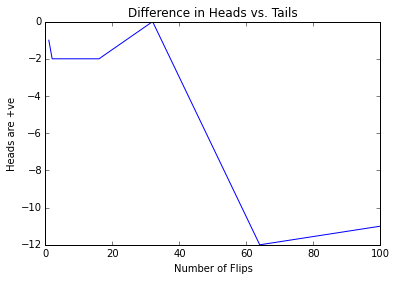

In [93]:
plt.plot(expos_of_2, diffs)
plt.title('Difference in Heads vs. Tails')
plt.ylabel('Heads are +ve')
plt.xlabel('Number of Flips')
plt.show()

Plotting our resulting "difference" data from the above `n_flip_sim()` function shows that the total variation can wander around as the number of flips increases.

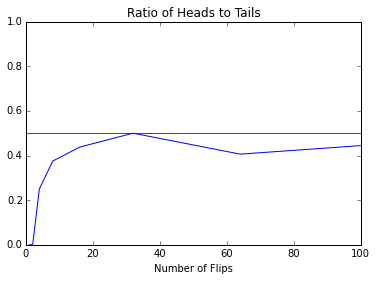

In [98]:
plt.plot(expos_of_2, ratios)
plt.ylim(0,1)
plt.hlines(0.5, xmin=0, xmax=expos_of_2[-1], color='red')
plt.title('Ratio of Heads to Tails')
plt.xlabel('Number of Flips')
plt.show()

However, plotting the ratio of heads to tails shows that the overall variation is approaches the expected ratio of 0.5 as the number of flips gets higher.

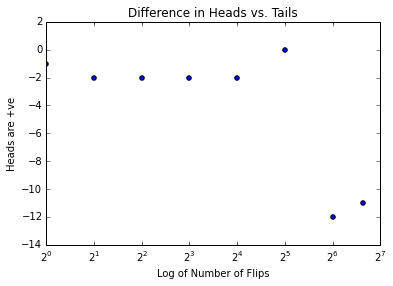

In [92]:
plt.scatter(expos_of_2, diffs)
plt.xscale('log', basex=2)
plt.xlim(-10,)
plt.title('Difference in Heads vs. Tails')
plt.ylabel('Heads are +ve')
plt.xlabel('Log of Number of Flips')
plt.show()

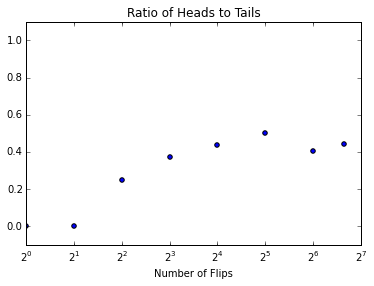

In [91]:
plt.scatter(expos_of_2, ratios)
plt.xscale('log', basex=2)
plt.xlim(-10,)
plt.ylim(-0.1,1.1)
plt.title('Ratio of Heads to Tails')
plt.xlabel('Number of Flips')
plt.show()

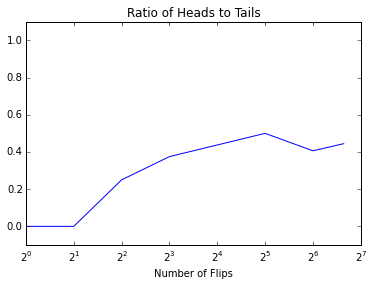

In [90]:
plt.plot(expos_of_2, ratios)
plt.xscale('log', basex=2)
plt.xlim(-10,)
plt.ylim(-0.1,1.1)
plt.title('Ratio of Heads to Tails')
plt.xlabel('Number of Flips')
plt.show()

### Analysis of n_flip_sim Plots

In [89]:
help(plt.xscale)

Help on function xscale in module matplotlib.pyplot:

xscale(*args, **kwargs)
    Set the scaling of the *x*-axis.
    
    call signature::
    
      xscale(scale, **kwargs)
    
    The available scales are: 'linear' | 'log' | 'symlog'
    
    Different keywords may be accepted, depending on the scale:
    
        'linear'
    
            
    
    
        'log'
    
            *basex*/*basey*:
               The base of the logarithm
            
            *nonposx*/*nonposy*: ['mask' | 'clip' ]
              non-positive values in *x* or *y* can be masked as
              invalid, or clipped to a very small positive number
            
            *subsx*/*subsy*:
               Where to place the subticks between each major tick.
               Should be a sequence of integers.  For example, in a log10
               scale: ``[2, 3, 4, 5, 6, 7, 8, 9]``
            
               will place 8 logarithmically spaced minor ticks between
               each major tick.
    
 